# Python example for Climatic Research Unit (CRU) time-series (TS) data

# Table of Contents

* [CRU TS data](#crutsdata)
* [Python data visualisation example](#pythonexample)
    * [Plot 1 - Global Map using Basemap](#map1)
    * [Plot 2 - Global Map using Cartopy](#map2)
    * [Plot 3 - Regional Map with Cartopy](#map3)
    * [Plot 4 - Timeseries](#map4)
* [Exporting and saving subsets of data](#exporting)
    * [Saving data to a NetCDF file](#netcdf)
    * [Exporting a spatial subset](#spatial)
    * [Exporting a temporal subset](#temporal)
    

## CRU TS data <a id="crutsdata"></a>

The following guide will assist with the manipulation and visualisation of the Climatic Research Unit (CRU) gridded time-series (TS) dataset. For more information on this data, or to understand the ways in which it can be downloaded, please see the CEDA CRU data user guide.

Search for the data in the CEDA Archive using Linux commands. Now we know the filname. 

In [3]:
! ls /badc/cru/data/cru_ts/cru_ts_4.02/data/tmp/cru_ts4.02.1901.2017.tmp.dat.nc

/badc/cru/data/cru_ts/cru_ts_4.02/data/tmp/cru_ts4.02.1901.2017.tmp.dat.nc


## Python data visualisation example <a id="pythonexample"></a>

##### Next we will use Python. The following will give a brief explanation of what each part of the code does in this script and may suggest ways in which this can be modified to adapt to different scenarios:

The code below is put at the beginning of the script to add the specific packages (tools) that are needed in python to achieve the outcome

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import csv

Now we can read in the data to the program so it can be viewed, manipulated and displayed as required. The text within the quotation marks is the file path. As we know the data is on the CEDA Archive, we can read it directly from the path we used above

In [2]:
filename = "/badc/cru/data/cru_ts/cru_ts_4.02/data/tmp/cru_ts4.02.1901.2017.tmp.dat.nc"
data = netCDF4.Dataset(filename)

To understand a bit more about what's inside the NetCDF file, you can print the variable names:

In [3]:
print(data.variables.keys())

odict_keys(['lon', 'lat', 'time', 'tmp', 'stn'])


The .keys() method provides only the variable names, without this you will get additional metadata. Each dimension in the file also has a variable, so you will see a variable for each dimension.

Next, the temperature, longitude and latitude variables are set. This allows the temperature data to be used within the script. If another parameter is required from the data, that variable should be selected. 

In [4]:
temp = data.variables['tmp'][:]
lon = data.variables['lon'][:]
lat = data.variables['lat'][:]
time = data.variables['time']

### Plot 1 - Global Map using Basemap <a id="map1"></a>

The temperature variable that has been set as 'temp' in the code above, is a function of latitude, longitude and time as it is 3-dimensional. To produce a map plot, the temperature values need to be averaged across the entire time period of the dataset. This will give 1 average value per grid point. The line below averages the temperature variable by the time axis. You could pick specific years that you want to view by subsetting the data, the below is similar to the climatology.

In [5]:
temp_av_1901_2017= np.mean(temp[:,:,:],axis = 0)


Firstly we will plot using Basemap, then we will explore other plotting methods. Now the gridded average has been calculated, the following code shows how a map can be plotted with this data. This example plot is for the globe. To create a regional map, change the llcrnrlat, llcrnrlon, urcrnrlat and urcrnrlon which are the lat/lon values of the lower left and upper right corners of the map.

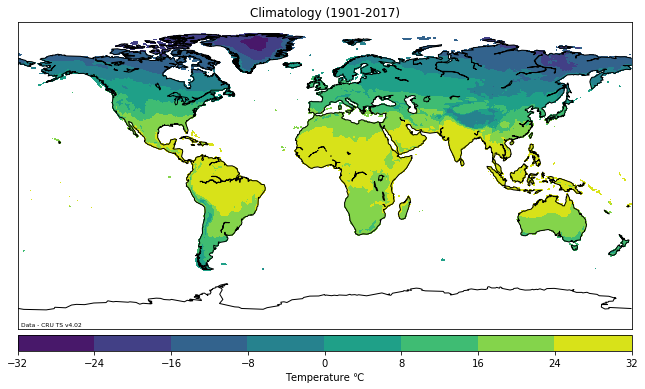

<Figure size 432x288 with 0 Axes>

In [7]:
plot1=plt.figure(figsize=(11,8))

# To set up the desired Basemap, the projection, resolution, latitude and longitude extent needs to be defined

# The latitude and longitude extent determine what area will be shown on the map (this example is global)

map = Basemap(projection="cyl", resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)

map.drawcoastlines(color="black") 

lons,lats = np.meshgrid(lon, lat)

x,y = map(lons, lats)

# contourf is a method of displaying the data on the map - viridis is the colour used to display the data

temp_plot = map.contourf(x, y, temp_av_1901_2017, cmap=plt.cm.viridis)

cb = map.colorbar(temp_plot, "bottom", size="5%", pad="2%", extend = 'both') # this creates a colour bar scale for the map

cb.set_label(u"Temperature \u2103") # this adds a label for the colour bar, this can be changed dependent on the parameter being plotted 

# adding 'u' before the quote marks and ''\u2103' within the quote marks adds the symbol for degrees Celsius)

plt.title("Climatology (1901-2017)") # this defines the title which will go on the map plot

plt.annotate('Data - CRU TS v4.02',(-178,-88), fontsize=6)

plt.show() 

plt.savefig("cruts_global_climatology.png") # this is the name and format the map image will be saved as

### Plot 2 - Global Map using Cartopy <a id="map2"></a>

Next we are going to plot using the cartopy module to create a contour map, this is to show a different method of plotting maps. The code below slices the temperature data so we now have the temperature data between 1961 and 1990 and the temperature data for just 2017 only. This allows us to calculate a 2017 anomaly value, compared to our reference period (1961-1990). Firstly, we will use a time conversion to more easily identify the index values we need to slice the data with to obtain 2017 (the same can be done to find 1961-1990 or any other year).

In [9]:
time_convert = netCDF4.num2date(time[:], time.units, time.calendar)
print(time_convert[1392:1404])

[datetime.datetime(2017, 1, 16, 0, 0) datetime.datetime(2017, 2, 15, 0, 0)
 datetime.datetime(2017, 3, 16, 0, 0) datetime.datetime(2017, 4, 16, 0, 0)
 datetime.datetime(2017, 5, 16, 0, 0) datetime.datetime(2017, 6, 16, 0, 0)
 datetime.datetime(2017, 7, 16, 0, 0) datetime.datetime(2017, 8, 16, 0, 0)
 datetime.datetime(2017, 9, 16, 0, 0)
 datetime.datetime(2017, 10, 16, 0, 0)
 datetime.datetime(2017, 11, 16, 0, 0)
 datetime.datetime(2017, 12, 16, 0, 0)]


In [10]:
temp_1961_1990 = np.mean(temp[720:1080,:,:],axis = 0)

temp_2017 = np.mean(temp[1392:1404,:,:],axis=0)

temp_2017_anom = temp_2017 - temp_1961_1990

The follow shows how to plot a map using cartopy:

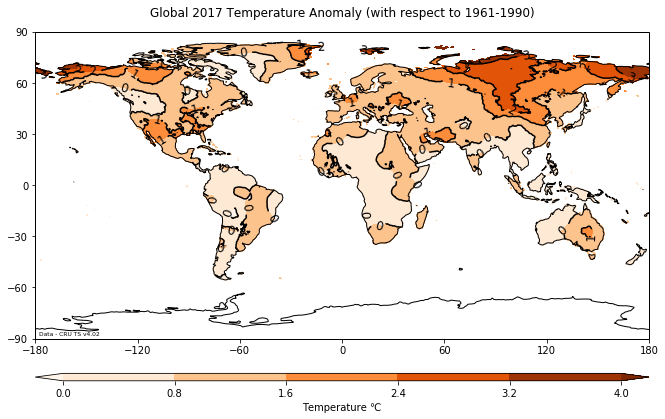

<Figure size 432x288 with 0 Axes>

In [11]:
# The following line sets up the figure we plan to plot. Figsize is just setting a size for the image so we can see it clearly

plot_2=plt.figure(figsize=(11,8)) 

# This line plots the axes using the specific cartopy projection we have specified
# There are many other projections, such as; ccrs.Robinson(), ccrs.Mercator(), ccrs.Orthographic(), ccrs.InterruptedGoodeHomolosine()

ax = plt.axes(projection=ccrs.PlateCarree())

# The cartopy.mpl.geoaxes.GeoAxes class has many options -

# here we have added coastlines and zoomed the map out as much as possible

ax.coastlines()
ax.set_global()

# This line plots the data (filled contours). We have provided our latitude, longitude and temperature values as well as the projection and colours

cs = ax.contourf(lon, lat, temp_2017_anom,extend='both', transform=ccrs.PlateCarree(), cmap='Oranges')

# This line is setting up the colour bar scale and label

cb_2 = plt.colorbar(cs, orientation='horizontal', aspect=75, pad=0.08)
cb_2.set_label(u"Temperature \u2103")

# This code plots the contour lines and labels

cs = ax.contour(lon, lat, temp_2017_anom, colors='k', linestyles='solid', transform=ccrs.PlateCarree())
plt.clabel(cs, fmt = '%d', colors = 'k', fontsize=12) 

# This code set up the ticks and labels around the border of the map to show the longitude and latitde values of the earth

ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 91, 30))

title = plt.title('Global 2017 Temperature Anomaly (with respect to 1961-1990)', y=1.03)
plt.annotate('Data - CRU TS v4.02',(-178,-88), fontsize=6)
plt.show()
plt.savefig("cruts_global_2017_anom.png")

### Plot 3 - Regional Map with Cartopy <a id="map3"></a>

Using the same data from above, we will now plot a regional map with Cartopy to show how this can be done. 

Quite simply, all that is different is the initial map set up. Set up a latitude longitude extent and the latitude and longitude in the centre of the map.

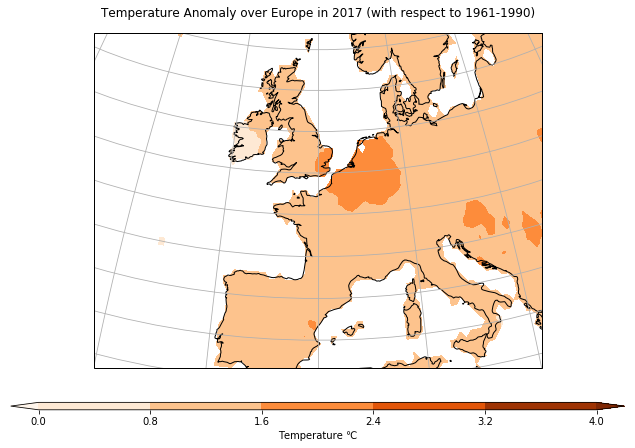

<Figure size 432x288 with 0 Axes>

In [13]:
plot_3=plt.figure(figsize=(11,8))

central_lon, central_lat = 0, 45

extent = [-20, 20, 35, 60]

ax2 = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))

ax2.set_extent(extent)

ax2.gridlines()
ax2.coastlines(resolution='50m')

data_fill = ax2.contourf(lon, lat, temp_2017_anom,extend='both',transform=ccrs.PlateCarree(), cmap='Oranges')

cbar = plt.colorbar(data_fill, orientation='horizontal', aspect=75, pad=0.08)
cbar.set_label(u"Temperature \u2103")

t = plt.title('Temperature Anomaly over Europe in 2017 (with respect to 1961-1990)', y=1.03)
plt.show()
plt.savefig("cruts_eu_2017_anom.png")

### Plot 4 - Timeseries <a id="map4"></a>

Next we will create a time series graph. For the time series graph, the data needs to be averaged in a different way. To create a time series plot, the data needs to be averaged across all grid points, so there is 1 global value vs time. The line of code below does exactly this. 

In [14]:
global_average= np.mean(temp[:,:,:],axis=(1,2))

To reduce the seasonal noise in this time series graph, an annual average needs to be calculated from the monthly data. The code below reshapes the global average into [117,12] as there are 117 years in the dataset, each with 12 months. Then the average is calculated for each year. These new annual average values are saved as 'annual_temp'.

In [15]:
annual_temp = np.mean(np.reshape(global_average, (117,12)), axis = 1)

For this plot, it is useful to look at the temperature values as an anomaly to a certain temperature period. The following code calculates the annual temperature anomaly in comparison to the average temperature in 1961-1990. The first line calculates the average temperature value for this time period (1961-1990). This is done by slicing the data with the indices 60:89 as this gives the values from 1961-1990, then averaging these values. The second line then deducts the average temperature value between 1961-1990 from each of the annual temperature values calculated above, saving it as 'temp_anomaly'.

In [16]:
av_1961_1990=np.mean(annual_temp[60:90])

temp_anomaly = annual_temp - av_1961_1990

The following code plots a time series graph. The anomaly data calculated above is plotted against time, in years. 

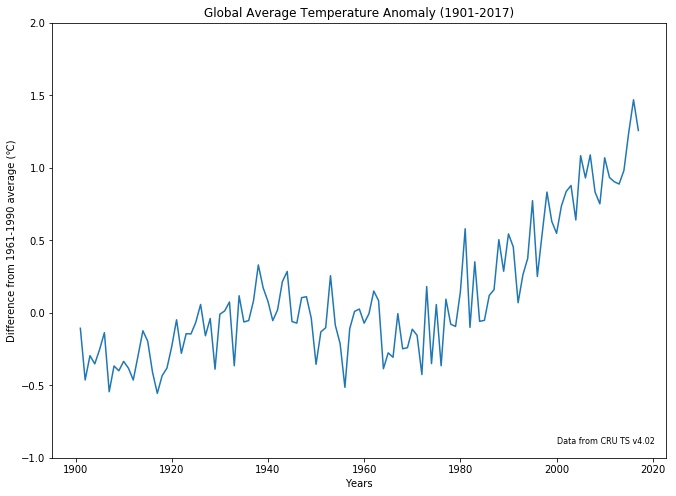

<Figure size 432x288 with 0 Axes>

In [17]:
plot_4 = plt.figure(figsize=(11,8))

years = np.arange(1901,2018,1)
plt.plot(years,temp_anomaly)

# This line sets a limit for the y-axis so the data can be viewed more clearly

plt.ylim(np.floor(min(temp_anomaly)), np.ceil(max(temp_anomaly))) 

# This line displays a title on the plot, this can be changed depending on the parameter being plotted

plt.title("Global Average Temperature Anomaly (1901-2017)")

plt.xlabel("Years") 

# This line displays a label for the y-axis, in this case it is temperature that is being displayed 

plt.ylabel(u"Difference from 1961-1990 average (\u2103)") 

plt.text(2000, -0.9, "Data from CRU TS v4.02", fontsize=8)

plt.show()
plt.savefig('temp_anom_ts.png') # This line is the name and format the graph will be saved as. This can be changed.

## Exporting and saving subsets of data <a id="exporting"></a>

This section will explain some methods of exporting subsets of data you have created so you can plot that data or save it for something else. We will also create a spatial and temporal subset of rainfall data and export this to show the complete workflow.

### Saving data to a NetCDF file <a id="netcdf"></a>

We have previously calculated a global temperature anomaly subset, where the values in 2017 are compared to a reference period (1961-1990). For this subset, the temperature data is a function of latitude and longitude. We are going to save it in a NetCDF file.

Firstly, we have to create the netcdf file and ensure we can write to it. This is done using the code below.

In [18]:
ncfile =  netCDF4.Dataset('global_temp_anomaly_2017.nc', mode='w',format='NETCDF4_CLASSIC')

Next we set up the dimensions. The code below gives each a name and a size. The CRU data has a high resolution (0.5x0.5 degree) and so these values are double what is normally expected for the globe (180 latitude values and 360 longitude). This can be identified by printing the length of the latitude and longitude variables set originally.

In [19]:
lat_dim = ncfile.createDimension('lat', 360)
lon_dim = ncfile.createDimension('lon', 720)

We can add certain metadata to our netcdf file to make it more informative. This is useful if we pass the data to someone else or use it after a long time. The below code is just adding a title to the data. There are lots of other details that can be added.

In [20]:
ncfile.title = 'CRU TS v4.02 Global temperature anomaly for 2017 (wrt 1961-1990)'

Next we add variables. We need latitude, longitude and temperature. For each it is required we add a unit and standard name. When creating the variable we give it a name, datatype and shape. The shapes are specified using the dimension names. We can then print a variable to check it looks correct. 

In [21]:
lat_var = ncfile.createVariable('lat',np.float32,('lat',))
lat_var.units = 'degrees_north'
lat_var.standard_name = 'latitude'

lon_var = ncfile.createVariable('lon', np.float32, ('lon',))
lon_var.units = 'degrees_east'
lon_var.standard_name = 'longitude'

temp_var = ncfile.createVariable('tmp', np.float, ('lat','lon'))
temp_var.units = 'K'
temp_var.standard_name = 'air_temperature'
print(temp_var)

<class 'netCDF4._netCDF4.Variable'>
float64 tmp(lat, lon)
    units: K
    standard_name: air_temperature
unlimited dimensions: 
current shape = (360, 720)
filling on, default _FillValue of 9.969209968386869e+36 used



Lastly, we assign data to each variable and close the netcdf file. 

In [22]:
lat_var[:] = lat
lon_var[:] = lon
temp_var[:,:] = temp_2017_anom

In [23]:
ncfile.close()

The Linux command below is printing the metadata from our new netcdf file to make sure it has all gone in as expected.

In [24]:
!ncdump -h global_temp_anomaly_2017.nc

netcdf global_temp_anomaly_2017 {
dimensions:
	lat = 360 ;
	lon = 720 ;
variables:
	float lat(lat) ;
		lat:units = "degrees_north" ;
		lat:standard_name = "latitude" ;
	float lon(lon) ;
		lon:units = "degrees_east" ;
		lon:standard_name = "longitude" ;
	double tmp(lat, lon) ;
		tmp:units = "K" ;
		tmp:standard_name = "air_temperature" ;

// global attributes:
		:title = "CRU TS v4.02 Global temperature anomaly for 2017 (wrt 1961-1990)" ;
}


### Exporting a spatial subset <a id="spatial"></a>

Now we are going to use precipitation data. We can see that in the archive using the code below:

In [25]:
! ls /badc/cru/data/cru_ts/cru_ts_4.02/data/pre/cru_ts4.02.1901.2017.pre.dat.nc

/badc/cru/data/cru_ts/cru_ts_4.02/data/pre/cru_ts4.02.1901.2017.pre.dat.nc


Using Python we will now read in precipitation data and subset the data to obtain Europe region only.There are many different ways to obtain a regional subset of the data. This is just one method.

First we read in the precipitation data and name variables as we have done before.

In order to create a regional subset, specifically Europe here, the code below sets latitude (lat_bnds) and longitude (lon_bnds) boundaries (range). These boundaries are then used to identify the index within the precipitation data.

When we select this data (pre), we slice the latitude and longitude values using our boundaries for Europe. This ensures the precipitation data is restricted to only the area we want. So this data can be exported to a csv file we are only going to abstract 1 month of data. Within the final line of code, weare slicing the data for 1 month - Jan 1901.

In [26]:
rain_ds = netCDF4.Dataset('/badc/cru/data/cru_ts/cru_ts_4.02/data/pre/cru_ts4.02.1901.2017.pre.dat.nc')

latitude = rain_ds.variables['lat'][:]
longitude = rain_ds.variables['lon'][:]

lat_bnds, lon_bnds = [35, 70], [-10, 30]

lat_index = np.where((latitude > lat_bnds[0]) & (latitude < lat_bnds[1]))[0]
lon_index = np.where((longitude > lon_bnds[0]) & (longitude < lon_bnds[1]))[0]

rain = rain_ds.variables['pre']

rain_eu = rain[0, lat_index, lon_index]

To save the data to a csv file, first we import the csv module. The second line of code contains the name of the csv file once it is saved.By opening the file, we can then write data into it. By adding 'w' we can write to the file. The new line setting will determine how each new line is seperated. The final lines of code then write the data into the open csv file.

In [27]:
with open('cru_pre_eu_01-1901.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerows(rain_eu)

### Exporting a temporal subset <a id="temporal"></a>

This is similar to some of the data manipulation we have done previously.

Using the precipitation data from above, the code below calculates the average rainfall in 2017 (Jan-Dec) for the whole globe.

In [28]:
rain_2017 = np.mean(rain[1392:1404,:,:],axis = 0)

The code below is the same as before - to save data to a csv file.

In [29]:
with open('cru_pre_2017_average.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerows(rain_2017)